In [1]:
%matplotlib inline


# OT for domain adaptation

This example introduces a domain adaptation in a 2D setting and the 4 OTDA
approaches currently supported in POT.


In [2]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import matplotlib.pylab as pl
import ot
from sklearn import svm
from sklearn.metrics import accuracy_score

## Generate data



In [3]:
n_source_samples = 150
n_target_samples = 150

Xs, ys = ot.datasets.make_data_classif('3gauss', n_source_samples)
Xt, yt = ot.datasets.make_data_classif('3gauss2', n_target_samples)

In [4]:
Xs

array([[-0.50903297, -0.85930844],
       [-1.73509304, -0.39717763],
       [-1.04604785,  0.51061312],
       [-0.95191113, -2.19423115],
       [-1.14659121, -1.04410225],
       [-0.23805965, -0.24720179],
       [-1.32418778, -1.62448218],
       [-1.4039841 , -2.09451157],
       [-2.12484658, -0.40971564],
       [ 0.84920347, -0.5793387 ],
       [ 0.0772748 , -1.82308057],
       [-1.08758893, -0.93951093],
       [-2.1598869 , -0.6651596 ],
       [-0.76083391, -1.16778095],
       [-2.10748026, -2.34748878],
       [-1.34075809, -1.88112215],
       [-1.00260525, -0.33381746],
       [-1.32827832, -0.96900819],
       [ 1.42642574, -0.59931667],
       [-1.51988801, -2.49900418],
       [-1.28351292, -1.54112606],
       [-0.87000948, -0.9877788 ],
       [-0.05015378, -0.45690718],
       [-1.07223797, -0.5331501 ],
       [-1.67308964, -0.88433373],
       [-1.74562819, -1.98180819],
       [ 0.58706214, -1.63390407],
       [-0.81195632, -1.73549712],
       [-1.26891925,

## Instantiate the different transport algorithms and fit them



In [5]:
# EMD Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport with Group lasso regularization
ot_lpl1 = ot.da.SinkhornLpl1Transport(reg_e=1e-1, reg_cl=1e0)
ot_lpl1.fit(Xs=Xs, ys=ys, Xt=Xt)

# Sinkhorn Transport with Group lasso regularization l1l2
ot_l1l2 = ot.da.SinkhornL1l2Transport(reg_e=1e-1, reg_cl=2e0, max_iter=20,
                                      verbose=True)
ot_l1l2.fit(Xs=Xs, ys=ys, Xt=Xt)

# transport source samples onto target samples
transp_Xs_emd = ot_emd.transform(Xs=Xs)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=Xs)
transp_Xs_lpl1 = ot_lpl1.transform(Xs=Xs)
transp_Xs_l1l2 = ot_l1l2.transform(Xs=Xs)

/home/wanxinli/.local/lib/python3.9/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|9.234489e+00|0.000000e+00|0.000000e+00
    1|2.459784e+00|2.754187e+00|6.774705e+00
    2|2.207980e+00|1.140429e-01|2.518043e-01
    3|2.151627e+00|2.619085e-02|5.635293e-02
    4|2.130653e+00|9.843939e-03|2.097401e-02
    5|2.119978e+00|5.035218e-03|1.067455e-02
    6|2.113891e+00|2.879430e-03|6.086802e-03
    7|2.111163e+00|1.292327e-03|2.728313e-03
    8|2.107736e+00|1.626074e-03|3.427333e-03
    9|2.105942e+00|8.514621e-04|1.793130e-03
   10|2.104199e+00|8.286345e-04|1.743612e-03
   11|2.102788e+00|6.708536e-04|1.410663e-03
   12|2.101260e+00|7.272182e-04|1.528075e-03
   13|2.101007e+00|1.205694e-04|2.533172e-04
   14|2.100427e+00|2.761039e-04|5.799360e-04
   15|2.099671e+00|3.598504e-04|7.555675e-04
   16|2.099522e+00|7.107564e-05|1.492249e-04
   17|2.099219e+00|1.442180e-04|3.027453e-04
   18|2.097529e+00|8.059565e-04|1.690517e-03
   19|2.097261e+00|1.274964e-04|2.673933e-04
It. 

## Fig 1 : plots source and target samples



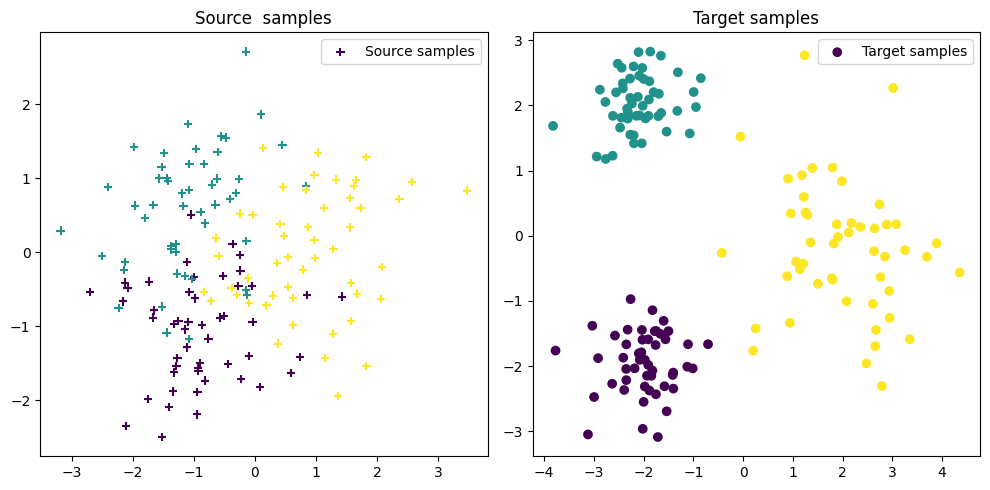

In [6]:
pl.figure(1, figsize=(10, 5))
pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
# pl.xticks([])
# pl.yticks([])
pl.legend(loc=0)
pl.title('Source  samples')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
# pl.xticks([])
# pl.yticks([])
pl.legend(loc=0)
pl.title('Target samples')
pl.tight_layout()

## Fig 2 : plot optimal couplings and transported samples



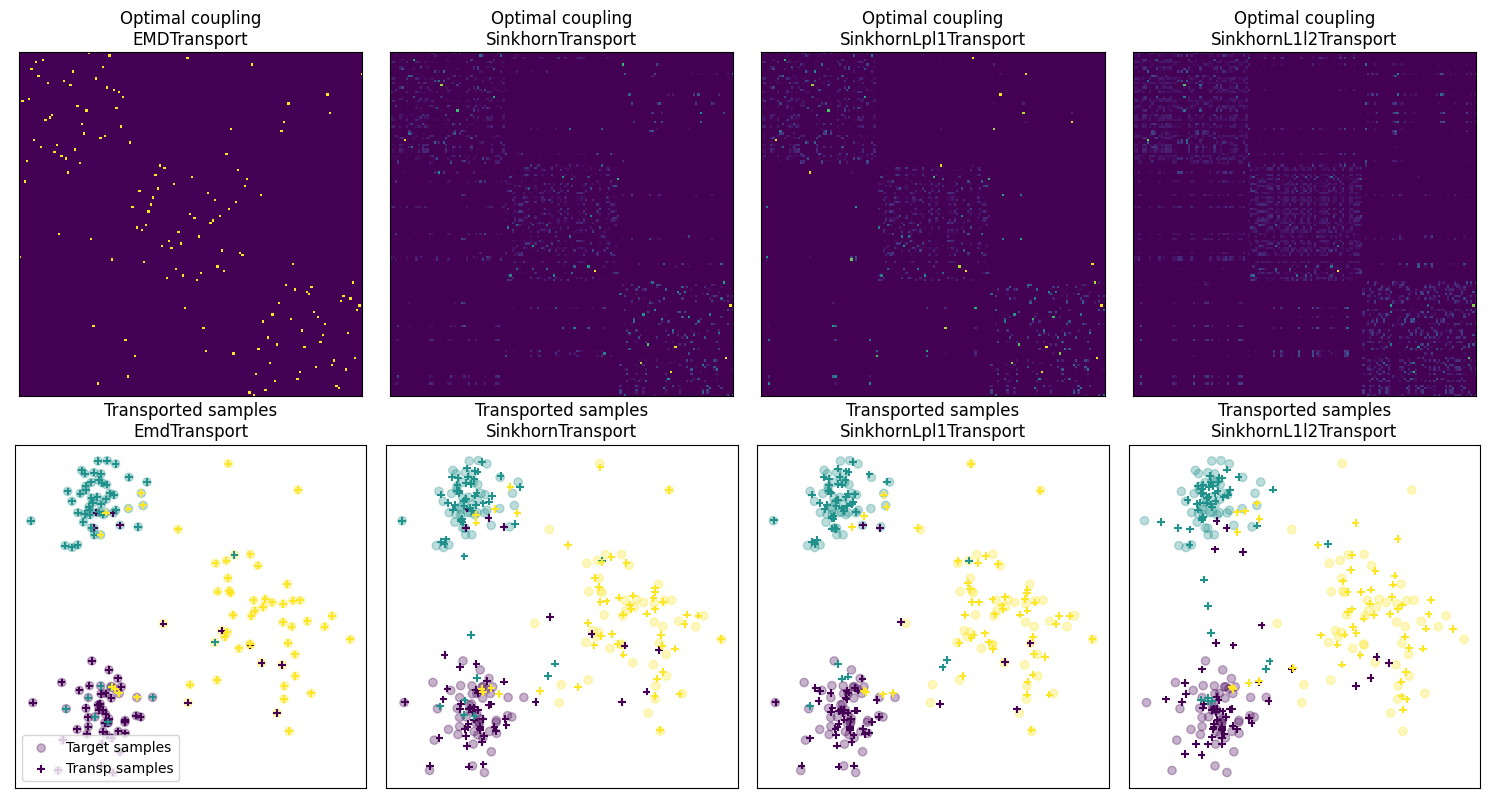

In [7]:
param_img = {'interpolation': 'nearest'}

pl.figure(2, figsize=(15, 8))
pl.subplot(2, 4, 1)
pl.imshow(ot_emd.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nEMDTransport')

pl.subplot(2, 4, 2)
pl.imshow(ot_sinkhorn.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornTransport')

pl.subplot(2, 4, 3)
pl.imshow(ot_lpl1.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornLpl1Transport')

pl.subplot(2, 4, 4)
pl.imshow(ot_l1l2.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornL1l2Transport')

pl.subplot(2, 4, 5)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nEmdTransport')
pl.legend(loc="lower left")

pl.subplot(2, 4, 6)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornTransport')

pl.subplot(2, 4, 7)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_lpl1[:, 0], transp_Xs_lpl1[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornLpl1Transport')

pl.subplot(2, 4, 8)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_l1l2[:, 0], transp_Xs_l1l2[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornL1l2Transport')
pl.tight_layout()

pl.show()

In [8]:
clf = svm.SVC()
clf.fit(Xt, yt)
target_pred_labels = clf.predict(Xt)
source_pred_labels = clf.predict(Xs)
trans_source_pred_labels = clf.predict(transp_Xs_sinkhorn)
print(accuracy_score(yt, target_pred_labels))
print(accuracy_score(ys, source_pred_labels))
print(accuracy_score(ys, trans_source_pred_labels)) # TODO: why????? is this too much better then my simulation

1.0
0.72
0.8066666666666666


In [9]:
import numpy as np

def encoder()

array([[-2.18008732, -2.03365584],
       [-1.90559411, -1.98208799],
       [-2.0328377 , -1.44537629],
       [-1.49968706, -1.46332174],
       [-1.97523744, -2.31239856],
       [-1.998345  , -2.5491496 ],
       [-3.76900771, -1.76178765],
       [-1.97369914, -1.90408686],
       [-1.01178382, -2.03530565],
       [-1.40127437, -2.34498638],
       [-1.71283937, -3.08796171],
       [-2.09583983, -1.80523249],
       [-1.82268749, -2.06814698],
       [-2.34774852, -2.21534553],
       [-1.58015946, -2.30886879],
       [-1.84354847, -2.14898183],
       [-1.8821171 , -2.37476145],
       [-1.77587156, -1.46412523],
       [-1.7581084 , -1.67610079],
       [-2.57460975, -1.53149368],
       [-2.40766019, -1.87017763],
       [-2.91428958, -1.87824325],
       [-3.1174861 , -3.04841003],
       [-3.02987792, -1.38087961],
       [-1.75082179, -2.43223461],
       [-2.02193023, -1.59579441],
       [-1.59667902, -1.30522884],
       [-1.41438858, -2.13576367],
       [-1.12127914,